|  |  | 
|----------|----------|
| Name: | Elad Siman Tov | 
|  Course:   | ME 036049   |
|  Homerwork:   | No. 4   |


### Computation

![](q1.jpeg)

#### Part a
Here I will use the 1D Unsteady Diffusion PINNs model for different diffusion coefficients and compare the final results. I will import a file called *PINN_Classes* where I stored the definitions of the different models.

In [4]:
import torch
import torch.nn as nn
from torch.autograd import grad
import torch.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PINN_Classes import Diffusion_PINNs_1D

##### Setting up the use cases

In [6]:
# num of points in the domain
Nx, Nt = 128, 128

# define domain dimensions and resolution
Lx_initial, Lx_final = 0, 1
t_initial, t_final = 0, 1
dx = (Lx_final - Lx_initial) / (Nx - 1)
dt = (t_final - t_initial) / (Nt-1)

# initiallize input parameters as tensors
x = torch.zeros(Nx, Nt)
t = torch.zeros(Nx, Nt)
for i in range(Nx):
    for j in range(Nt):
        x[i,j] = Lx_initial + dx * i
        t[i,j] = t_initial + dt * j


##### Using different models

epoch: 0, loss: 9.884058952331543
epoch: 100, loss: 5.375155925750732
epoch: 200, loss: 1.8222825527191162
epoch: 300, loss: 1.0107076168060303
epoch: 400, loss: 0.5160622000694275
epoch: 500, loss: 0.7290481328964233
epoch: 600, loss: 0.21031984686851501
epoch: 700, loss: 0.16514664888381958
epoch: 800, loss: 0.15130473673343658
epoch: 900, loss: 0.1296786367893219


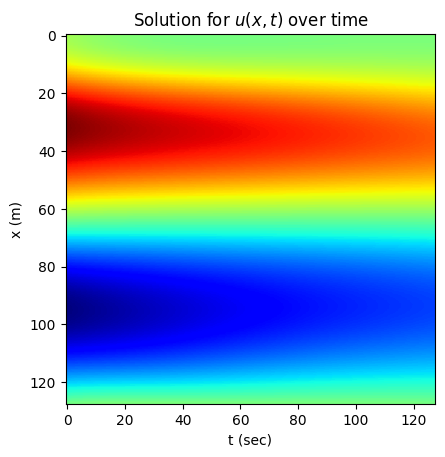

epoch: 0, loss: 9.949614524841309
epoch: 100, loss: 5.260753631591797
epoch: 200, loss: 1.3717031478881836
epoch: 300, loss: 0.7234114408493042
epoch: 400, loss: 0.594848096370697
epoch: 500, loss: 0.5564428567886353
epoch: 600, loss: 0.534443736076355
epoch: 700, loss: 0.5207151174545288
epoch: 800, loss: 0.7185965776443481
epoch: 900, loss: 0.4995579123497009


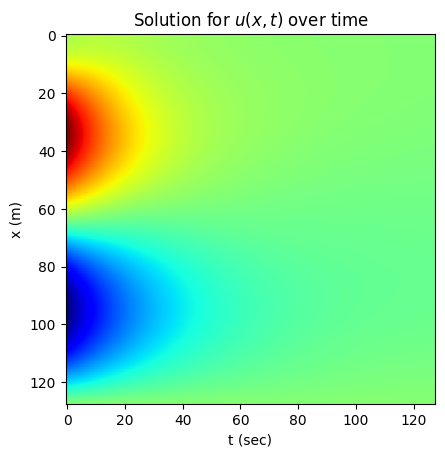

epoch: 0, loss: 10.544726371765137
epoch: 100, loss: 5.769279956817627
epoch: 200, loss: 2.121523857116699
epoch: 300, loss: 1.3499469757080078
epoch: 400, loss: 1.121272087097168
epoch: 500, loss: 0.9147472381591797
epoch: 600, loss: 0.7634562849998474
epoch: 700, loss: 0.5963137745857239
epoch: 800, loss: 0.5422375202178955
epoch: 900, loss: 0.48784297704696655


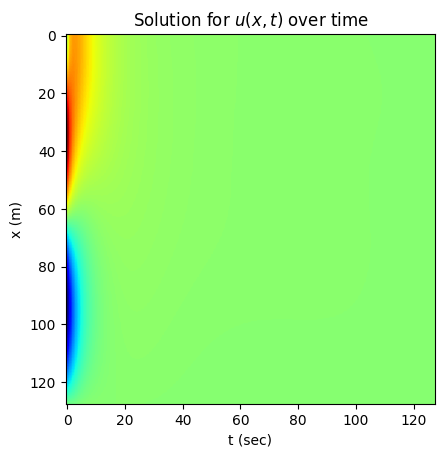

In [11]:
diffusion_coefficient_cases = [0.01, 0.1, 1]
for alpha in diffusion_coefficient_cases:
    model = Diffusion_PINNs_1D(use_ffm=False, diff_coeff=alpha)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(1000):
    # compute various losses
        eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

        # compute total loss
        total_loss = eq_loss + 20*BC_loss + 20*IC_loss

        # backward pass
        total_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # skip by 100 epochs before printing
        if not epoch%100:
            print(f"epoch: {epoch}, loss: {total_loss}")

    u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
    u_np = u.detach().numpy() # convert into a np array
    u_reshaped = u_np.reshape(Nx,Nt)

    plt.imshow(u_reshaped[:,:], cmap='jet')
    plt.title(f"Solution for $u(x,t)$ over time for alpha={alpha}")
    plt.xlabel("t (sec)")
    plt.ylabel("x (m)")
    plt.show()

#### Part b - Allen Cahn

In [2]:
from PINN_Classes import Allen_Cahn_1D_PINNs

##### Setting up the use cases

In [18]:
# num of points in the domain
Nx, Nt = 128, 128

# define domain dimensions and resolution
Lx_initial, Lx_final = -1, 1
t_initial, t_final = 0, 1
dx = (Lx_final - Lx_initial) / (Nx - 1)
dt = (t_final - t_initial) / (Nt-1)

# initiallize input parameters as tensors
x = torch.zeros(Nx, Nt)
t = torch.zeros(Nx, Nt)
for i in range(Nx):
    for j in range(Nt):
        x[i,j] = Lx_initial + dx * i
        t[i,j] = t_initial + dt * j


[Linear(in_features=2, out_features=64, bias=True), Linear(in_features=64, out_features=64, bias=True), Tanh(), Linear(in_features=64, out_features=64, bias=True), Tanh(), Linear(in_features=64, out_features=64, bias=True), Tanh(), Linear(in_features=64, out_features=1, bias=True)]
epoch: 0, loss: 2.7435812950134277
epoch: 500, loss: 1.271928071975708
epoch: 1000, loss: 1.2308411598205566
epoch: 1500, loss: 1.2105846405029297


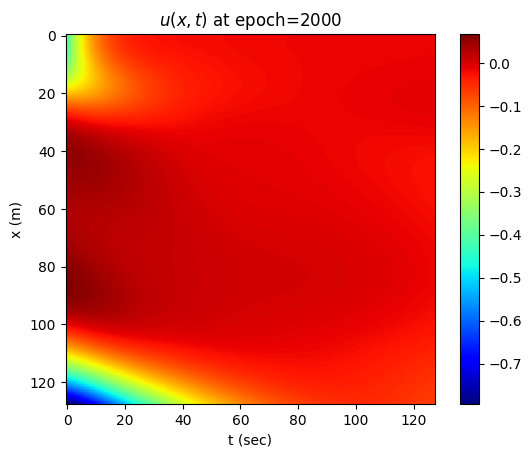

epoch: 2000, loss: 1.2105900049209595
epoch: 2500, loss: 1.1406433582305908
epoch: 3000, loss: 1.1152777671813965
epoch: 3500, loss: 1.0980675220489502
epoch: 4000, loss: 1.087104082107544
epoch: 4500, loss: 1.0818383693695068


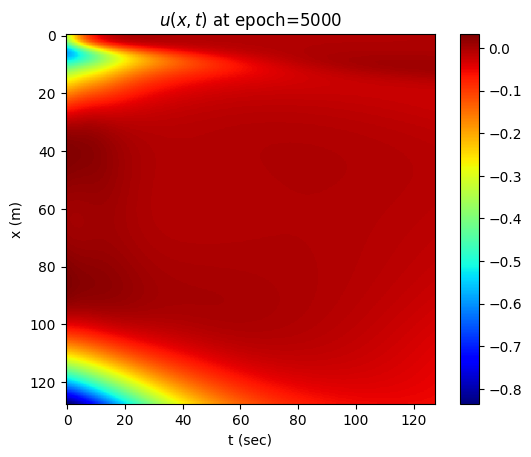

epoch: 5000, loss: 1.0803287029266357
epoch: 5500, loss: 1.0654339790344238
epoch: 6000, loss: 1.094079852104187
epoch: 6500, loss: 1.0522353649139404
epoch: 7000, loss: 1.0569201707839966
epoch: 7500, loss: 1.0620243549346924
epoch: 8000, loss: 1.5693728923797607
epoch: 8500, loss: 1.0399234294891357
epoch: 9000, loss: 1.0429580211639404
epoch: 9500, loss: 1.1171810626983643
epoch: 10000, loss: 1.0381782054901123
epoch: 10500, loss: 1.0868754386901855
epoch: 11000, loss: 1.028810739517212
epoch: 11500, loss: 1.0250781774520874
epoch: 12000, loss: 1.0227251052856445
epoch: 12500, loss: 1.129384160041809
epoch: 13000, loss: 1.0400304794311523
epoch: 13500, loss: 1.0252381563186646
epoch: 14000, loss: 1.0309717655181885
epoch: 14500, loss: 1.0202580690383911


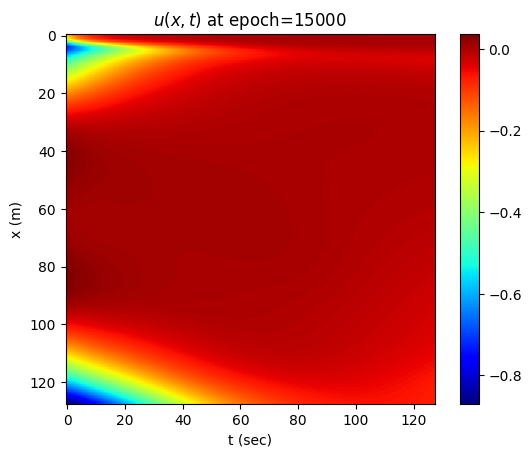

epoch: 15000, loss: 1.0499407052993774
epoch: 15500, loss: 1.0285069942474365
epoch: 16000, loss: 1.024185061454773
epoch: 16500, loss: 1.0168805122375488
epoch: 17000, loss: 1.016084909439087
epoch: 17500, loss: 1.0288238525390625
epoch: 18000, loss: 1.0408368110656738
epoch: 18500, loss: 1.0304381847381592
epoch: 19000, loss: 1.0215221643447876
epoch: 19500, loss: 1.0138227939605713


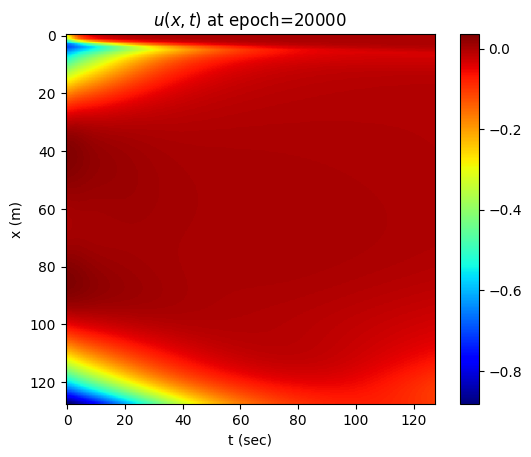

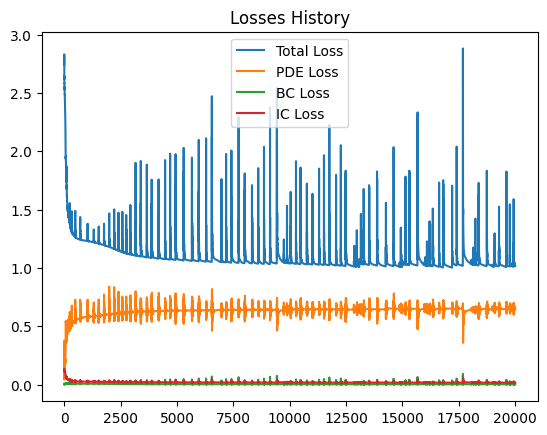

In [19]:
model = Allen_Cahn_1D_PINNs()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_of_epochs = 20000
losses_history = np.zeros((num_of_epochs, 4))

for epoch in range(num_of_epochs):
# compute various losses
    eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

    # compute total loss
    total_loss = eq_loss + 20*BC_loss + 20*IC_loss

    # save date for losses history
    losses_history[epoch, 0] = total_loss
    losses_history[epoch, 1] = eq_loss
    losses_history[epoch, 2] = BC_loss
    losses_history[epoch, 3] = IC_loss

    # backward pass
    total_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # skip by 500 epochs before every print
    if not epoch%500:
        print(f"epoch: {epoch}, loss: {total_loss}")
    
    # plot solutions by the end of [5000, 15000, 20000] epochs
    if epoch+1 in [2000, 5000, 15000, 20000]:
        u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
        u_np = u.detach().numpy() # convert into a np array
        u_reshaped = u_np.reshape(Nx,Nt)
        plt.imshow(u_reshaped[:,:], cmap='jet')
        plt.colorbar()
        plt.title(f"$u(x,t)$ at epoch={epoch+1}")
        plt.xlabel("t (sec)")
        plt.ylabel("x (m)")
        plt.show()


plt.plot(losses_history)
plt.title("Losses History")
plt.legend(["Total Loss", "PDE Loss", "BC Loss", "IC Loss"])


#### Part d - Studying the effect of FFMs

In [ ]:
model = Allen_Cahn_1D_PINNs(use_ffm=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_of_epochs = 20000
losses_history = np.zeros((num_of_epochs, 4))

for epoch in range(num_of_epochs):
# compute various losses
    eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

    # compute total loss
    total_loss = eq_loss + 20*BC_loss + 20*IC_loss

    # save date for losses history
    losses_history[epoch, 0] = total_loss
    losses_history[epoch, 1] = eq_loss
    losses_history[epoch, 2] = BC_loss
    losses_history[epoch, 3] = IC_loss

    # backward pass
    total_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # skip by 500 epochs before every print
    if not epoch%500:
        print(f"epoch: {epoch}, loss: {total_loss}")
    
    # plot solutions by the end of [5000, 15000, 20000] epochs
    if epoch+1 in [5000, 15000, 20000]:
        u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
        u_np = u.detach().numpy() # convert into a np array
        u_reshaped = u_np.reshape(Nx,Nt)
        plt.imshow(u_reshaped[:,:], cmap='jet')
        plt.title(f"$u(x,t)$ at epoch={epoch+1}")
        plt.xlabel("t (sec)")
        plt.ylabel("x (m)")
        plt.show()


plt.plot(losses_history)
plt.title("Losses History")
plt.legend(["Total Loss", "PDE Loss", "BC Loss", "IC Loss"])